# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Initialize Chrome browser
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table', class_='table')
# Extract headers from the table
headers = [th.text.strip() for th in table.find_all('th')]
# Extract all rows of data from the table
all_rows = table.find_all('tr')
# Display headers to verify if the data was extracted correctly
headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_data= []

# Loop through the scraped data to create a list of rows
for row in all_rows[1:]:  # Start from 1 to skip header row
    # Find all data cells within the row
    cells = row.find_all('td')  # Using 'td' to find data cells

    # Extract text from each cell and store it in a list
    row_data = [cell.text.strip() for cell in cells]

    # Append the row data to your list
    mars_data.append(row_data)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(mars_data, columns=headers)  # Use extracted headers for column names

In [8]:
# Confirm DataFrame was created successfully
print(df.head())

   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype('int64')
df['ls'] = df['ls'].astype('int64')
df['month'] = df['month'].astype('int64')
df['min_temp'] = df['min_temp'].astype('float64')
df['pressure'] = df['pressure'].astype('float64')

In [11]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
# To answer this question lets see how many unique months and days we have
# Group by 'month' and count unique 'terrestrial_date' values for each month
monthly_unique_dates = df.groupby('month')['terrestrial_date'].nunique()

# Convert the Series to a DataFrame and reset the index for better display of the data
monthly_unique_dates_df = monthly_unique_dates.reset_index()
monthly_unique_dates_df.columns = ['month', 'number of days']

# Convert DataFrame to string to remove index and print it with data types to match assignment output
print(monthly_unique_dates_df.to_string(index=False))
print(monthly_unique_dates_df.dtypes)


 month  number of days
     1             174
     2             178
     3             192
     4             194
     5             149
     6             147
     7             142
     8             141
     9             134
    10             112
    11             138
    12             166
month             int64
number of days    int64
dtype: object


In [13]:
# 2. How many Martian days' worth of data are there?
total_martians_days = monthly_unique_dates_df['number of days'].sum()

# Print the total number of days
print(total_martians_days)

1867


In [14]:
# 3. What is the average low temperature by month?
# Group by 'month' and calculate the mean of 'min_temp' for each month
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()

# Convert the Series to a DataFrame and add a column name
average_low_temp_by_month_df = average_low_temp_by_month.reset_index()
average_low_temp_by_month_df.columns = ['month', 'average min temp']

# Print the results while removing unnecessary index column with data types
print(average_low_temp_by_month_df.to_string(index=False))
print(average_low_temp_by_month_df.dtypes)

 month  average min temp
     1        -77.160920
     2        -79.932584
     3        -83.307292
     4        -82.747423
     5        -79.308725
     6        -75.299320
     7        -72.281690
     8        -68.382979
     9        -69.171642
    10        -71.982143
    11        -71.985507
    12        -74.451807
month                 int64
average min temp    float64
dtype: object


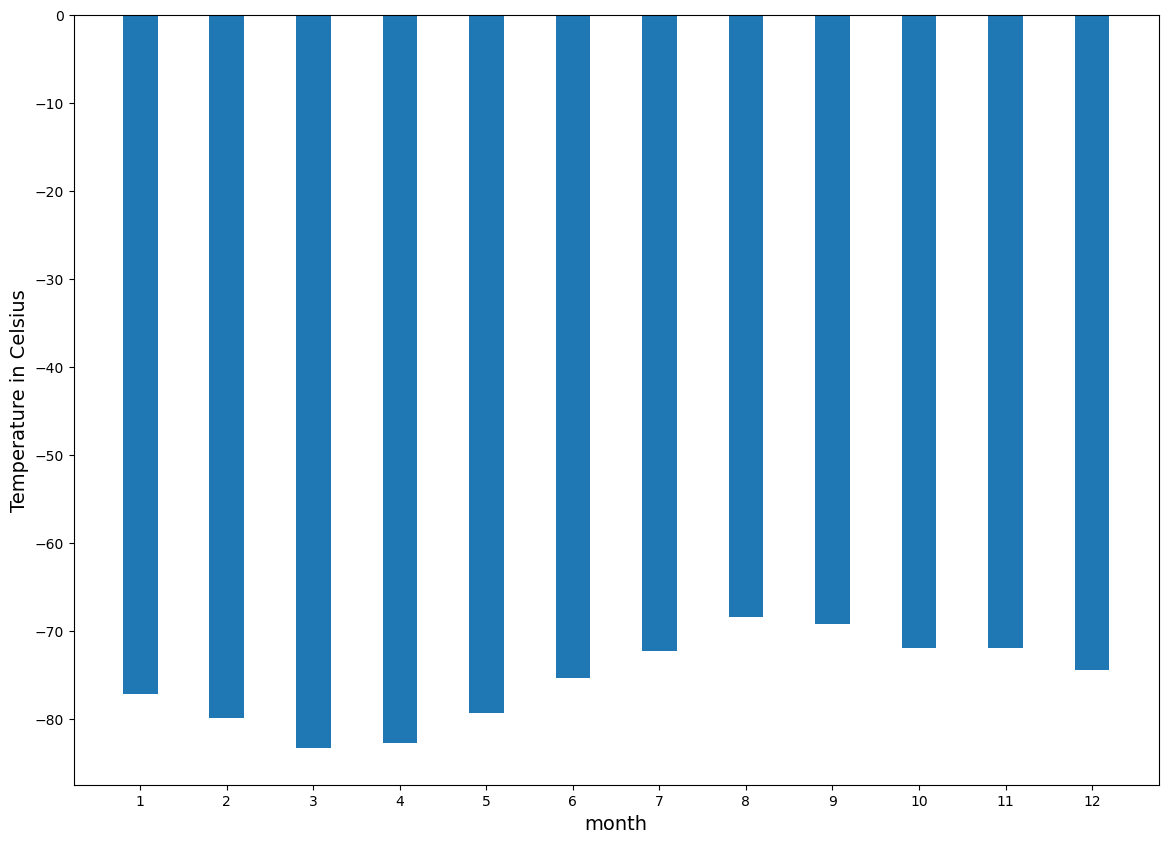

In [15]:
# Plot the average temperature by month
plt.figure(figsize=(14, 10))  # Set the figure size
plt.bar(average_low_temp_by_month_df['month'], average_low_temp_by_month_df['average min temp'], width=0.4)  # Plot bar 
plt.xlabel('month', fontsize=14)  # Label for the x-axis with a larger font size
plt.ylabel('Temperature in Celsius', fontsize=14)  # Label for the y-axis with a larger font size
plt.xticks(average_low_temp_by_month_df['month'])  # Ensure all months are labeled in the x-axis
plt.show()  # Display the plot

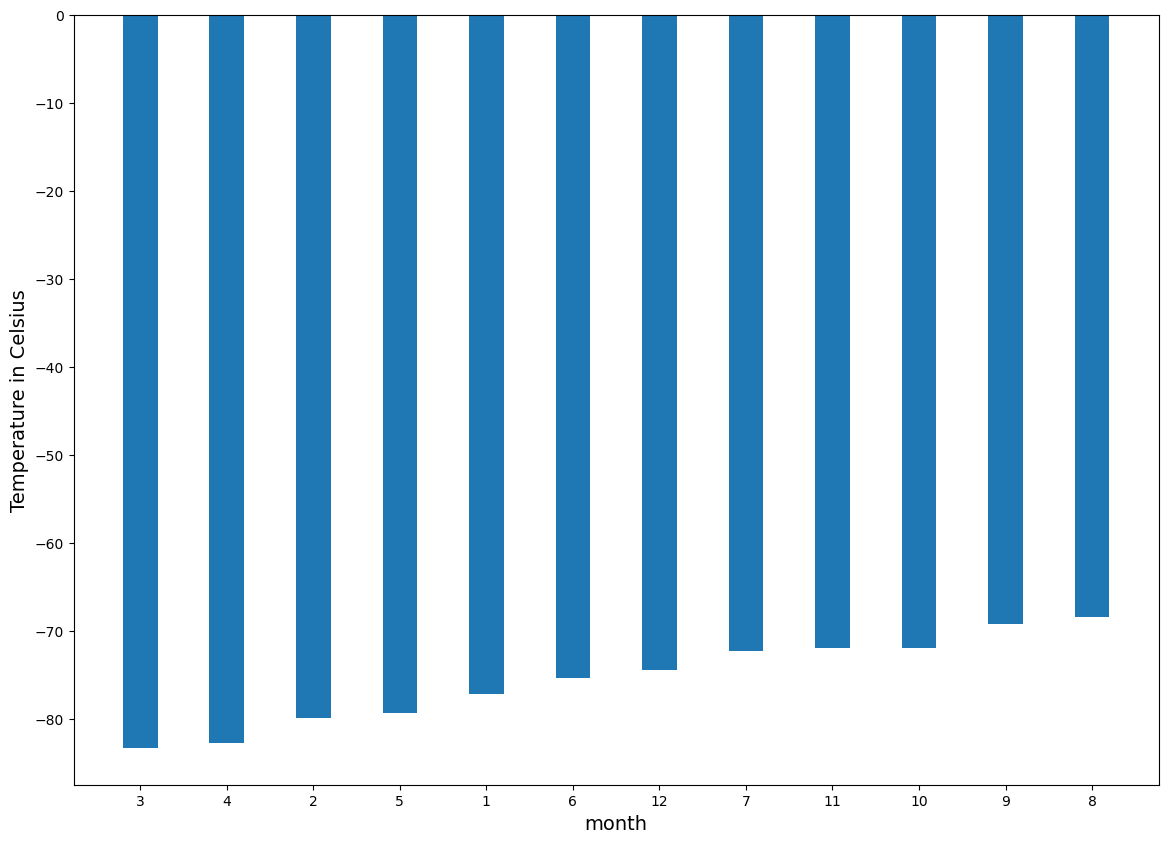

In [16]:
# Identify the coldest and hottest months in Curiosity's location

# Sort by 'Average Min Temp' from lowest to highest for the desired display on the bar graph
sorted_df = average_low_temp_by_month_df.sort_values(by='average min temp')

#  Plotting the average minimum temperature by month
plt.figure(figsize=(14, 10))  # Set the figure size 
# Ensure bars are plotted against an index (not 'Month')
plt.bar(range(len(sorted_df['month'])), sorted_df['average min temp'], width=0.4)  # Plot bar with a set width
plt.xlabel('month', fontsize=14) # Label for the x-axis
plt.ylabel('Temperature in Celsius', fontsize=14)  # Label for the y-axis
# Sort correctly'Month' values to their positions on the x-axis
plt.xticks(range(len(sorted_df['month'])), sorted_df['month'])  # Label each x position with the correct 'Month'
plt.show()  # Display the plot

In [17]:
# 4. Average pressure by Martian month
average_pressure = df.groupby('month')['pressure'].mean()

# Convert the Series to a DataFrame and set column names
average_pressure_df = average_pressure.reset_index()
average_pressure_df.columns = ['month', 'average pressure']

# Print the results while removing unnecessary index column
print(average_pressure_df.to_string(index=False))
# Print data types
print(average_pressure_df.dtypes)

 month  average pressure
     1        862.488506
     2        889.455056
     3        877.322917
     4        806.329897
     5        748.557047
     6        745.054422
     7        795.105634
     8        873.829787
     9        913.305970
    10        887.312500
    11        857.014493
    12        842.156627
month                 int64
average pressure    float64
dtype: object


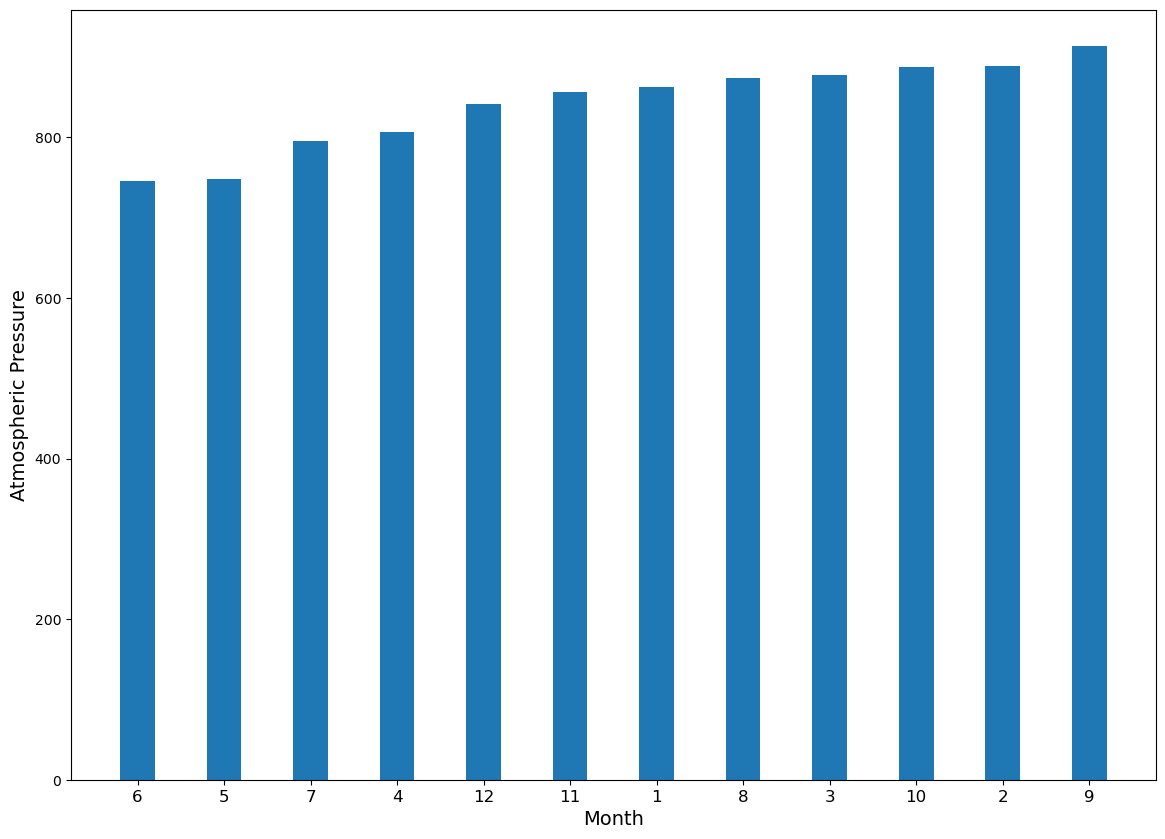

In [20]:
# Plot the average pressure by month
# Sort by 'average pressure' from lowest to highest 
sorted_pressure = average_pressure_df.sort_values(by='average pressure')
# Set the figure size
plt.figure(figsize=(14, 10))  
# Sort by 'pressure' to have a plot showing bars in increasing order (by 'pressure')
plt.bar(range(len(sorted_pressure['month'])), sorted_pressure['average pressure'], width=0.4)  # Bar plot with defined width
plt.xlabel('Month', fontsize=14)  # Label for the x-axis 
plt.ylabel('Atmospheric Pressure', fontsize=14)  # Label for the y-axis 
# Use the sorted_pressure DataFrame to label the x-axis correctly
plt.xticks(range(len(sorted_pressure['month'])), sorted_pressure['month'], fontsize=12)  # Ensure all months are labeled on the x-axis
# Display the plot
plt.show()  


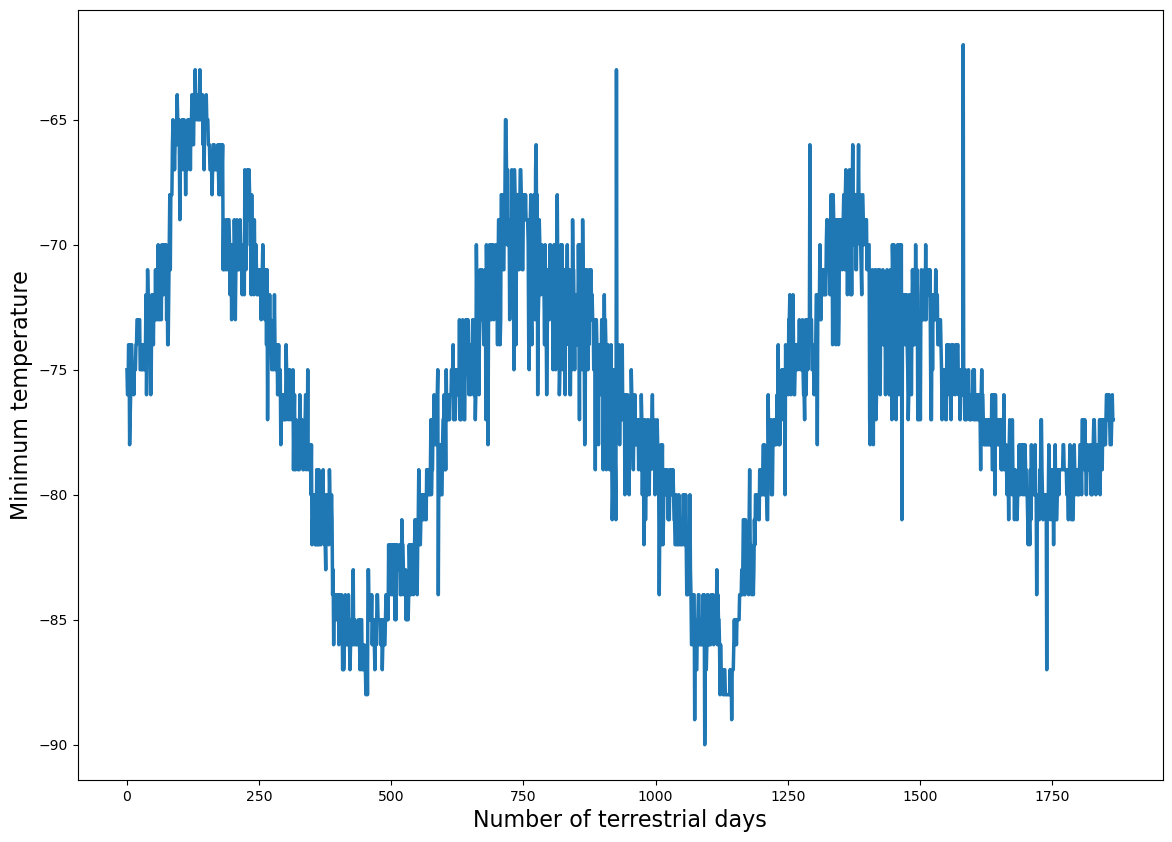

In [21]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Count the total number of terrestrial days first
terrestrial_days = df['terrestrial_date']
# Create a line plot
plt.figure(figsize=(14, 10))
plt.plot(range(len(terrestrial_days)), df['min_temp'], linewidth=2.5) #sort by the number of days on the graph
plt.xlabel('Number of terrestrial days', size=16) # Set x-label with distrtinct size of the label text
plt.ylabel('Minimum temperature', size=16) # Set y-label with distrtinct size of the label text
#Display the plot
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV. The code below saves both the original data and the 

# Create 'saved_data' folder if it does not exist
os.makedirs('saved_data', exist_ok=True)
# Set the paths where files are saved
original_data_path = 'saved_data/original_data.csv'
merged_data_path = 'saved_data/merged_statistics.csv'

# Save the originally scraped data frame as a CSV file
df.to_csv(original_data_path, index=False)
print(f"Original data saved to {original_data_path}")

# Merge previously created data frames on 'month'
merged_statistics = pd.merge(monthly_unique_dates_df, average_low_temp_by_month, on='month')
merged_statistics = pd.merge(merged_statistics, average_pressure_df, on='month')

# Save the merged data frame as a CSV file in the 'saved_data' folder
merged_statistics.to_csv(merged_data_path, index=False)
print(f"Merged data saved to {merged_data_path}")

Original data saved to saved_data/original_data.csv
Merged data saved to saved_data/merged_statistics.csv


In [23]:
# Close browser session
browser.quit()